# Detecção de Fraudes em Cartões de Crédito com Algoritmos de Machine Learning

Neste projeto iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, de acordo com a pesquisa da CNDL/SPC Brasil mostra que 59% dos internautas sofreram algum tipo de fraude financeira nos últimos 12 meses, contra 46% em 2019. Isso corresponde a um contingente 16,7 milhões de brasileiros. O estudo estima que o prejuízo decorrente de fraudes financeiras sofridas no universo dos internautas brasileiros chegou a R$ 2,7 bilhões nos últimos 12 meses, incluídos os gastos na busca de reparação do problema.

<p align=center>
<img src="https://www.texascitizensbank.com/wp-content/uploads/2019/04/credit-card-fraud.jpg" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que não sendo detectado acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Devido ao enorme volume de dados de cada cliente e cada atividade financeira, um algoritmo de *Machine Learning* pode ser utilizado para identificar com eficácia padrões suspeitos nas transações. Para aumentar a precisão das análises, muitas instituições estão investindo no aprimoramento de algoritmos de Inteligência Artifical. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Sobre os Dados

O *dataset* utilizado neste projeto foi retirado do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) e contém operações financeiras realizadas em Setembro de 2013 que ocorreram no perído de dois dias.

Podemos observar que o *dataset* é bastante desbalanceado, uma vez que possui 492 fraudes das 284.807 transações, correspondendo há cerca de 0,17% do total.

Todas as *features* do *dataset* são numéricas. Devido ao sigilo do cliente, as colunas foram renomeadas para V1, V2, ..., V28, e suas variáveis passaram por uma transformação PCA, que consiste em reduzir a dimensionalidade do *dataset*, ou seja, diminuir a quantidade de variáveis do mesmo. Para saber mais sobre PCA veja neste [link](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

In [ ]:
# importar os pacotes necessários
import pandas  as pd
import numpy   as np
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.tree    import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

#importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

Os dados fornecidos pelo *Kaggle* estão prontos para uso e não precisam de qualquer alteração. Podemos passar para a análise exploratória a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Olhando as cinco primeiras entradas do dataframe é possível tirar algumas conclusões:

* A transformação PCA alterou as variáveis V1-v28 para numéricas, garantindo o anonimato dos dados.

* As duas únicas exceções foram as variáveis `Time` e `Amount`, contendo os segundos decorridos entre cada transação e a primeira transação no *dataset*, e o valor da transação, respectivamente.

* A *feature* `Class` é a variável alvo e assume os valores:

  0 - para transações regulares

  1 - para transações fraudulentas

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Verificando abaixo o resumo estatístico por meio do método `describe()` podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a variável `Time`.

Nota-se que a variável `Amount` tem um valor médio de 88.34 e uma mediana de 22. O desvio padrão é de 250.12 e temos um valor máximo em uma transação de 25.961,16.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Quanto à qualidade do *dataset*, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza, então estamos prontos para seguir em frente.

In [4]:
# verificar se há valores nulos
df.isnull().sum().max()

0

Como foi informado na descrição dos dados, as entradas relativas à transações fraudulentas correspondam a 0,17% do total. Vamos verificar essa discrepância no gráfico abaixo.


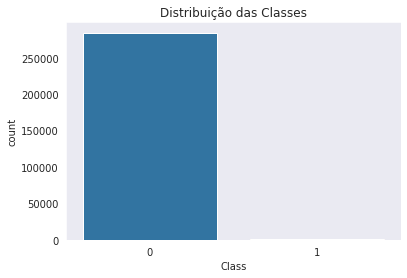

In [5]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot(x='Class', data=df)
ax.set_title('Distribuição das Classes')
plt.show()

Agora vamos verificar a distribuição das duas classes ao longo do tempo. No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

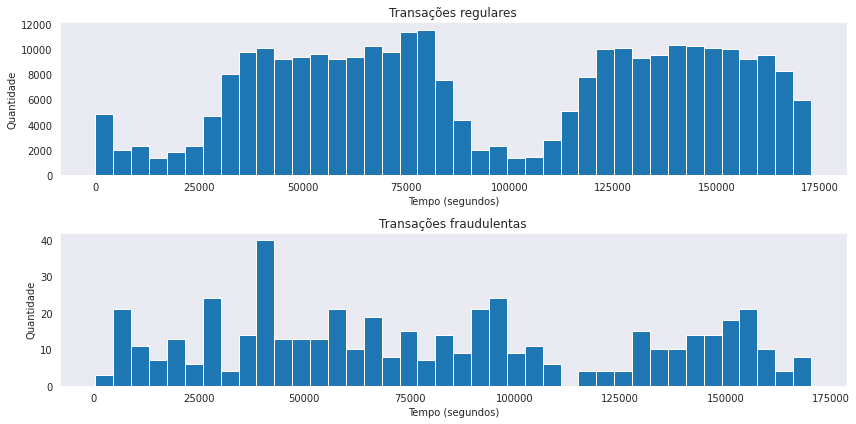

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax[0].hist(df.Time[df.Class == 0], bins=40)
ax[0].set_title('Transações regulares')
ax[0].set_xlabel('Tempo (segundos)')
ax[0].set_ylabel('Quantidade')
plt.tight_layout()

ax[1].hist(df.Time[df.Class == 1], bins=40)
ax[1].set_title('Transações fraudulentas')
ax[1].set_xlabel('Tempo (segundos)')
ax[1].set_ylabel('Quantidade')
plt.tight_layout()

Embora o número de transações fraudulentas seja significativamente menor do que o número de transações regulares, podemos ver um comportamento distinto, especialmente em torno da marca de tempo 100.000.

Observe que o número de transações regulares cai drasticamente em torno da marca de 90.000 segundos, para aumentar novamente em torno da marca de 110.000 segundos. Não seria absurdo supor que esse período seja durante a noite, quando as pessoas naturalmente realizam menos compras do que durante o dia. Por outro lado, um grande número de transações fraudulentas ocorreram em torno da marca de 100.000, o que poderia confirmar a premissa anterior, considerando que os fraudadores devem preferir cometer fraudes tarde da noite, supondo que haveria menos vigilância.

Isso é apenas uma hipótese. Vamos esperar para ver como nosso modelo de *Machine Learning* interpretará esses números.

Podemos fazer a mesma análise utilizando a variável `Amount` de cada transação.

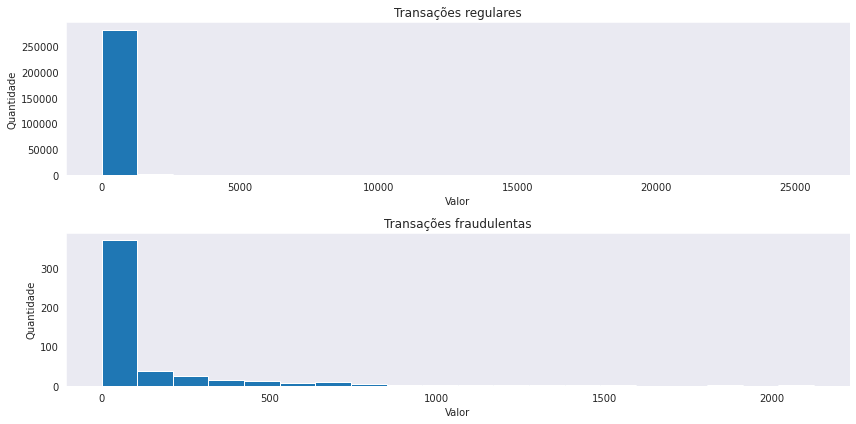

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax[0].hist(df.Amount[df.Class == 0], bins=20)
ax[0].set_title('Transações regulares')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Quantidade')
plt.tight_layout()

ax[1].hist(df.Amount[df.Class == 1], bins=20)
ax[1].set_title('Transações fraudulentas')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Quantidade')
plt.tight_layout()

Quanto ao valor das transações, aparentemente não há um *insight* significativo que possamos obter delas. A maioria das transações, regulares e fraudulentas, eram de valores "pequenos". Como vimos anteriormente, a maioria das transações são de menos de 100.00.

No entanto, podemos realizar uma inspeção mais profunda com um gráfico de *boxplot*.

Usamos o *boxplot* para ver se há alguma diferença no padrão transações em relação à dimensão `Amount`. De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *Machine Learning*.

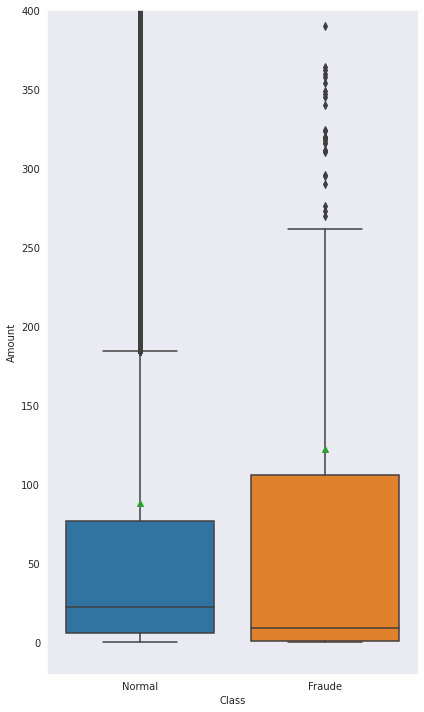

In [8]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout()

Vamos plotar um gráfico de matriz de correlação para determinar a correlação entre as variáveis.

In [9]:
#cria uma variável que recebe a função corr(), que calcula a correlação entre as colunas.
corr = df.corr()

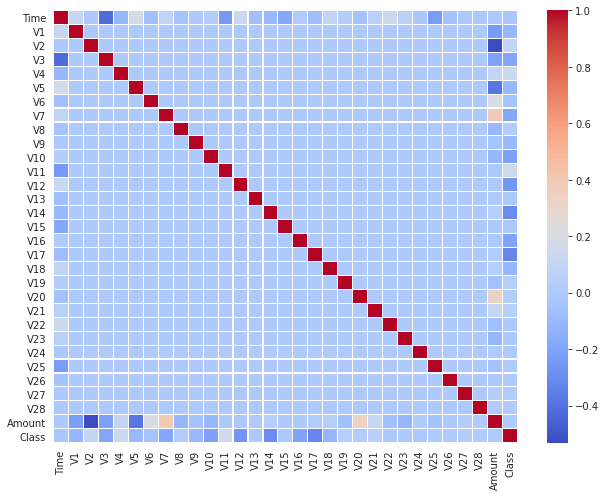

In [10]:
#plota um gráfico de correlação utilizando a variável criada com a função corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax)
plt.tight_layout()

Não foi observado nenhuma correlação forte entre as variáveis.

## Preparando os dados

**Padronizar as variáveis `Time` e `Amount`**

Este é um passo essencial para que os dados sejam interpretados de forma correta pelo algoritmo de *Machine Learning*. Uma vez que a coluna `Amount` possui *outliers*, será usada a padronização por meio da classe `StandardScaler`.

In [11]:
#criar uma cópia do dataframe
df_clean = df.copy()

#padronizar as colunas Time e Amount
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

Após a padronização vamos verificar como ficou o *dataframe*:

In [12]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Dividir entre conjuntos de treino e teste**

Depois de padronizar as *features* `Time` e `Amount`, vamos dividir o *dataset* em treino e teste. Caso contrário, não teremos parâmetros para conferir se no momento do balanceamento dos dados foi adequado. Usaremos a divisão padrão para o conjunto de teste de 25%.
Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos o parâmetro `stratify=True`.

In [13]:
#separar target vector da feature matrix
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

#dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

Como mencionado antes, o dataset está bastante desbalanceado. Como existe uma grande diferença na distribuição das classes(284.315 classe 0 e 492 classe 1) o conjunto de treino pode ser tendencioso e influenciar o algoritmo de *Machine Learning* a exibir resultados desbalanceados, por exemplo, ignorando a classe com menos entradas.

Para resolver esse problema, vamos usar a biblioteca `imblearn` e aplicar técnicas de balanceamento de dados. Existem duas abordagens principais para isso, sendo:

- *Random Oversampling*: Duplica aleatoriamente observações da classe de menor ocorrência utilizando *RandomOverSampler()*
- *Random Undersampling*: Exclui aleatoriamente observações da classe de maior ocorrência utilizando *RandomUnderSampler()*

Utilizaremos o *Random Undersamping*.

In [14]:
#usar técnica de undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

Vamos verificar como ficou os dados após o balanceamento:

1    369
0    369
dtype: int64


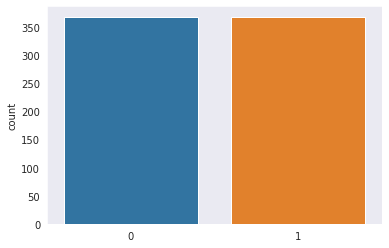

In [15]:
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

Nós balanceamos os dados, com 369 entradas para cada classe. Vamos verificar a matriz de correlação novamente para ver se podemos determinar alguma correlação.


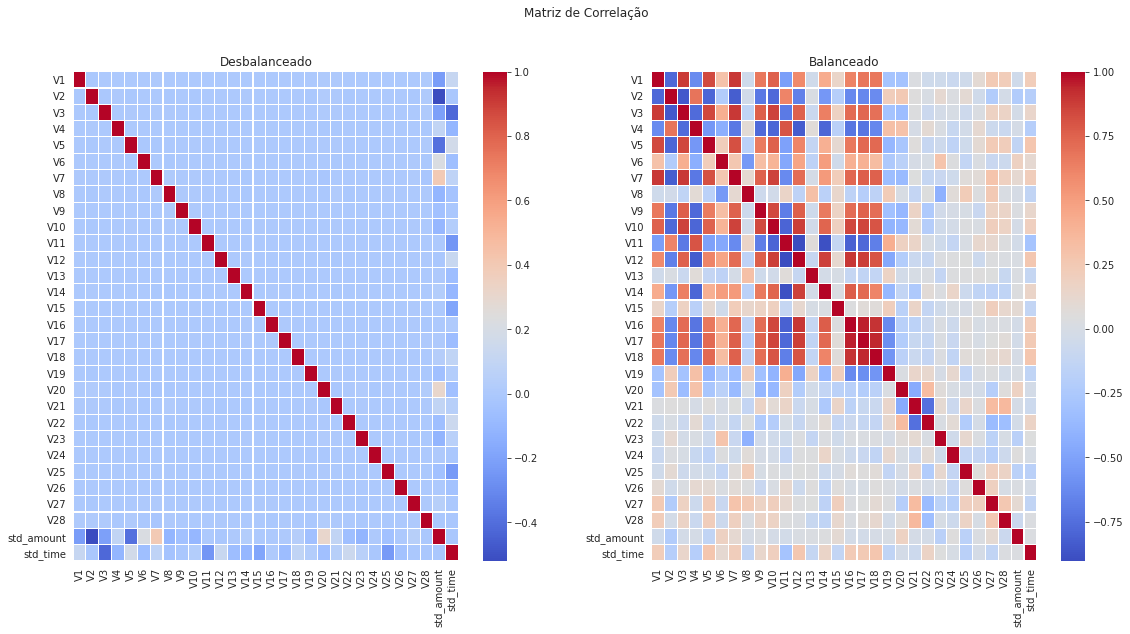

In [16]:
#plotar matriz de correção
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (19,9))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

## Modelo de Machine Learning

Com todos os dados preparados e após uma análise exploratória completa ,vamos utilizar dois dos principais métodos de classificação de *Machine Learning*:
- Regressão Logística
- *Decision Tree*

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

### Regressão Logística

O modelo de Regressão Logística é usado para determinar as chances de uma determinada classe ou evento existir. No nosso caso, vai estabelecer a probabilidade de uma transação pertencer a classe 0 ou 1, ou seja, regular ou fraudulenta.

In [17]:
#instanciar e treinar o modelo de Regressão Logística
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_rus, y_rus)

y_pred_lr = model_lr.predict(X_test)

Vamos avaliar a acurácia do modelo usando o `classification_report`, `roc_auc_score` e `confusion_matrix`.

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.89      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202

ROC AUC score: 0.93



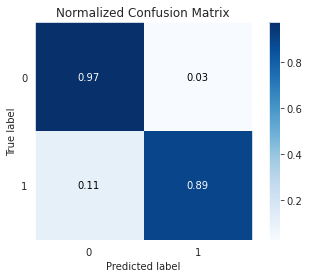

In [18]:
# exibir o relatório de classificação
print(classification_report(y_test, y_pred_lr))

# imprimir o score AUC
print("ROC AUC score: {:.2f}\n".format(roc_auc_score(y_test, y_pred_lr)))


# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True);

O modelo teve uma acurácia de 97% e uma AUC de 93%, o que significa que o nosso modelo de Regressão Logística teve um desempenho muito bom.

A partir da matriz de confusão podemos concluir que 97% das transações regulares foram corretamente classificadas como regulares(Verdadeiro Negativo), e 89% das transações fraudulentas foram corretamente classificadas como fraudes(Verdadeiro Positivo).

### Decision Tree

Nós vimos que o modelo de Regressão Logística teve um bom desempenho. Agora vamos ver como o modelo de *Decision Tree* se sai.

In [19]:
#instanciar e treinar o modelo de Decision Tree
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=0)
model_tree.fit(X_rus, y_rus)

y_pred_tree = model_tree.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.03      0.87      0.06       123

    accuracy                           0.96     71202
   macro avg       0.52      0.91      0.52     71202
weighted avg       1.00      0.96      0.98     71202

ROC AUC Score: 0.91



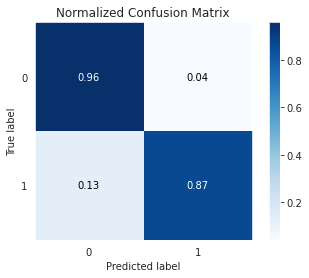

In [20]:
# classification report
print(classification_report(y_test, y_pred_tree))

# ROC AUC score
print("ROC AUC Score: {:.2f}\n".format(roc_auc_score(y_test, y_pred_tree)))

# plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree, normalize=True);

O modelo de *Decision Tree* obteve um desempenho com uma acurácia de 96% e *AUC score* de 91%. Os verdadeiros positivos e verdadeiros negativos foram bem previstos, com 96% e 87% respectivamente. 

## Conclusão

Ambos os modelos, de Regressão Logística e *Decision Tree* desempenharam muito bem na classificação das atividades de cartão de crédito, com uma acurácia, AUC e precisão acima de 90%.

Embora tenham produzido resultados semelhantes, o modelo de Regressão Logística exibiu um resultado melhor, com uma acurácia de 97%.

É importante também ressaltar o pré-processamento e o balanceamento dos dados. Lembre-se de como a matriz de correlação teve um desempenho melhor após o balanceamento dos mesmos.

Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.

Os algoritmos de *Machine Learning* para detectar fraudes de cartão de crédito são altamente eficientes, mas ainda existem falhas a serem corrigidas. Um dos maiores problemas é a ocorrência de Falsos Positivos, ou seja, quando o algoritmo detecta incorretamente uma fraude.